### Bagging: Random Forest

Un Random Forest es un modelo de aprendizaje automático basado en el concepto de árboles de decisión. Es particularmente útil para tareas de clasificación y regresión, y se basa en la combinación de múltiples árboles de decisión para mejorar la precisión y la estabilidad del modelo.

Las técnicas de bagging se basan en la combinación de modelos distintos (estimados sobre muestras distintas, mediante remuestreo) para aumentar la robustez de las estimaciones y reducir la varianza y el sesgo en las predicciones, proporcionando una única predicción mediante un "consenso" de las predicciones de los modelos que se combinan. 

Los modelos random forest o bosques aleatorios están basados en la construcción de un conjunto de árboles de decisión. Para la construcción de cada uno de estos árboles sólo se utliza una parte de las observaciones, y en cada nodo no se evalúan todas las variables candidatas, sino sólo una parte.

Para realizar la inferencia, a cada observación se le asgina la probabilidad de target media que le correspondería por cada uno de los árboles que forman parte del random forest.

Algunas implementaciones permiten controlar directamente la profundidad de los árboles, mientras que otros controlan el número total de nodos o el número mínimo de observaciones en nodos finales. El resto de parametrizaciones se van a dejar en: 100 árboles y sólo 6 (raíz del número de variables candidatats totales) variables candidatas por árbol.

Ventajas:

* Interacción entre variables
* Son más robustos a cambios en los conjuntos de entrenamiento
* Algunas implementaciones permiten trabajar directamente con varriables categóricas (ko)
* Algunas implementaciones permiten trabajar con missings (ko)

Restricciones:

* Se pierede interpretabilidad
* Sobreajuste a la muestra de desarrollo si no se controla la profundidad
* Sesgo cuando hay variables categóricas con muchas categorías

Parámetros:

* n_estimadores: número de árboles
* max_depth: profunidad máxima
* min_samples_split: mínimo tamaño de un nodo para partirlo
* min_samples_leaf: mínimo tamaño en una nueva hoja/partición
* max_features: número variables consideradas para partir un nodo

#### Importar paquetes

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#### Cargar Datos


In [232]:
titanic = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/titanic (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
# Ponemos columna PassengerId como çindice.

titanic.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Descripción y visualización de los datos

In [235]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

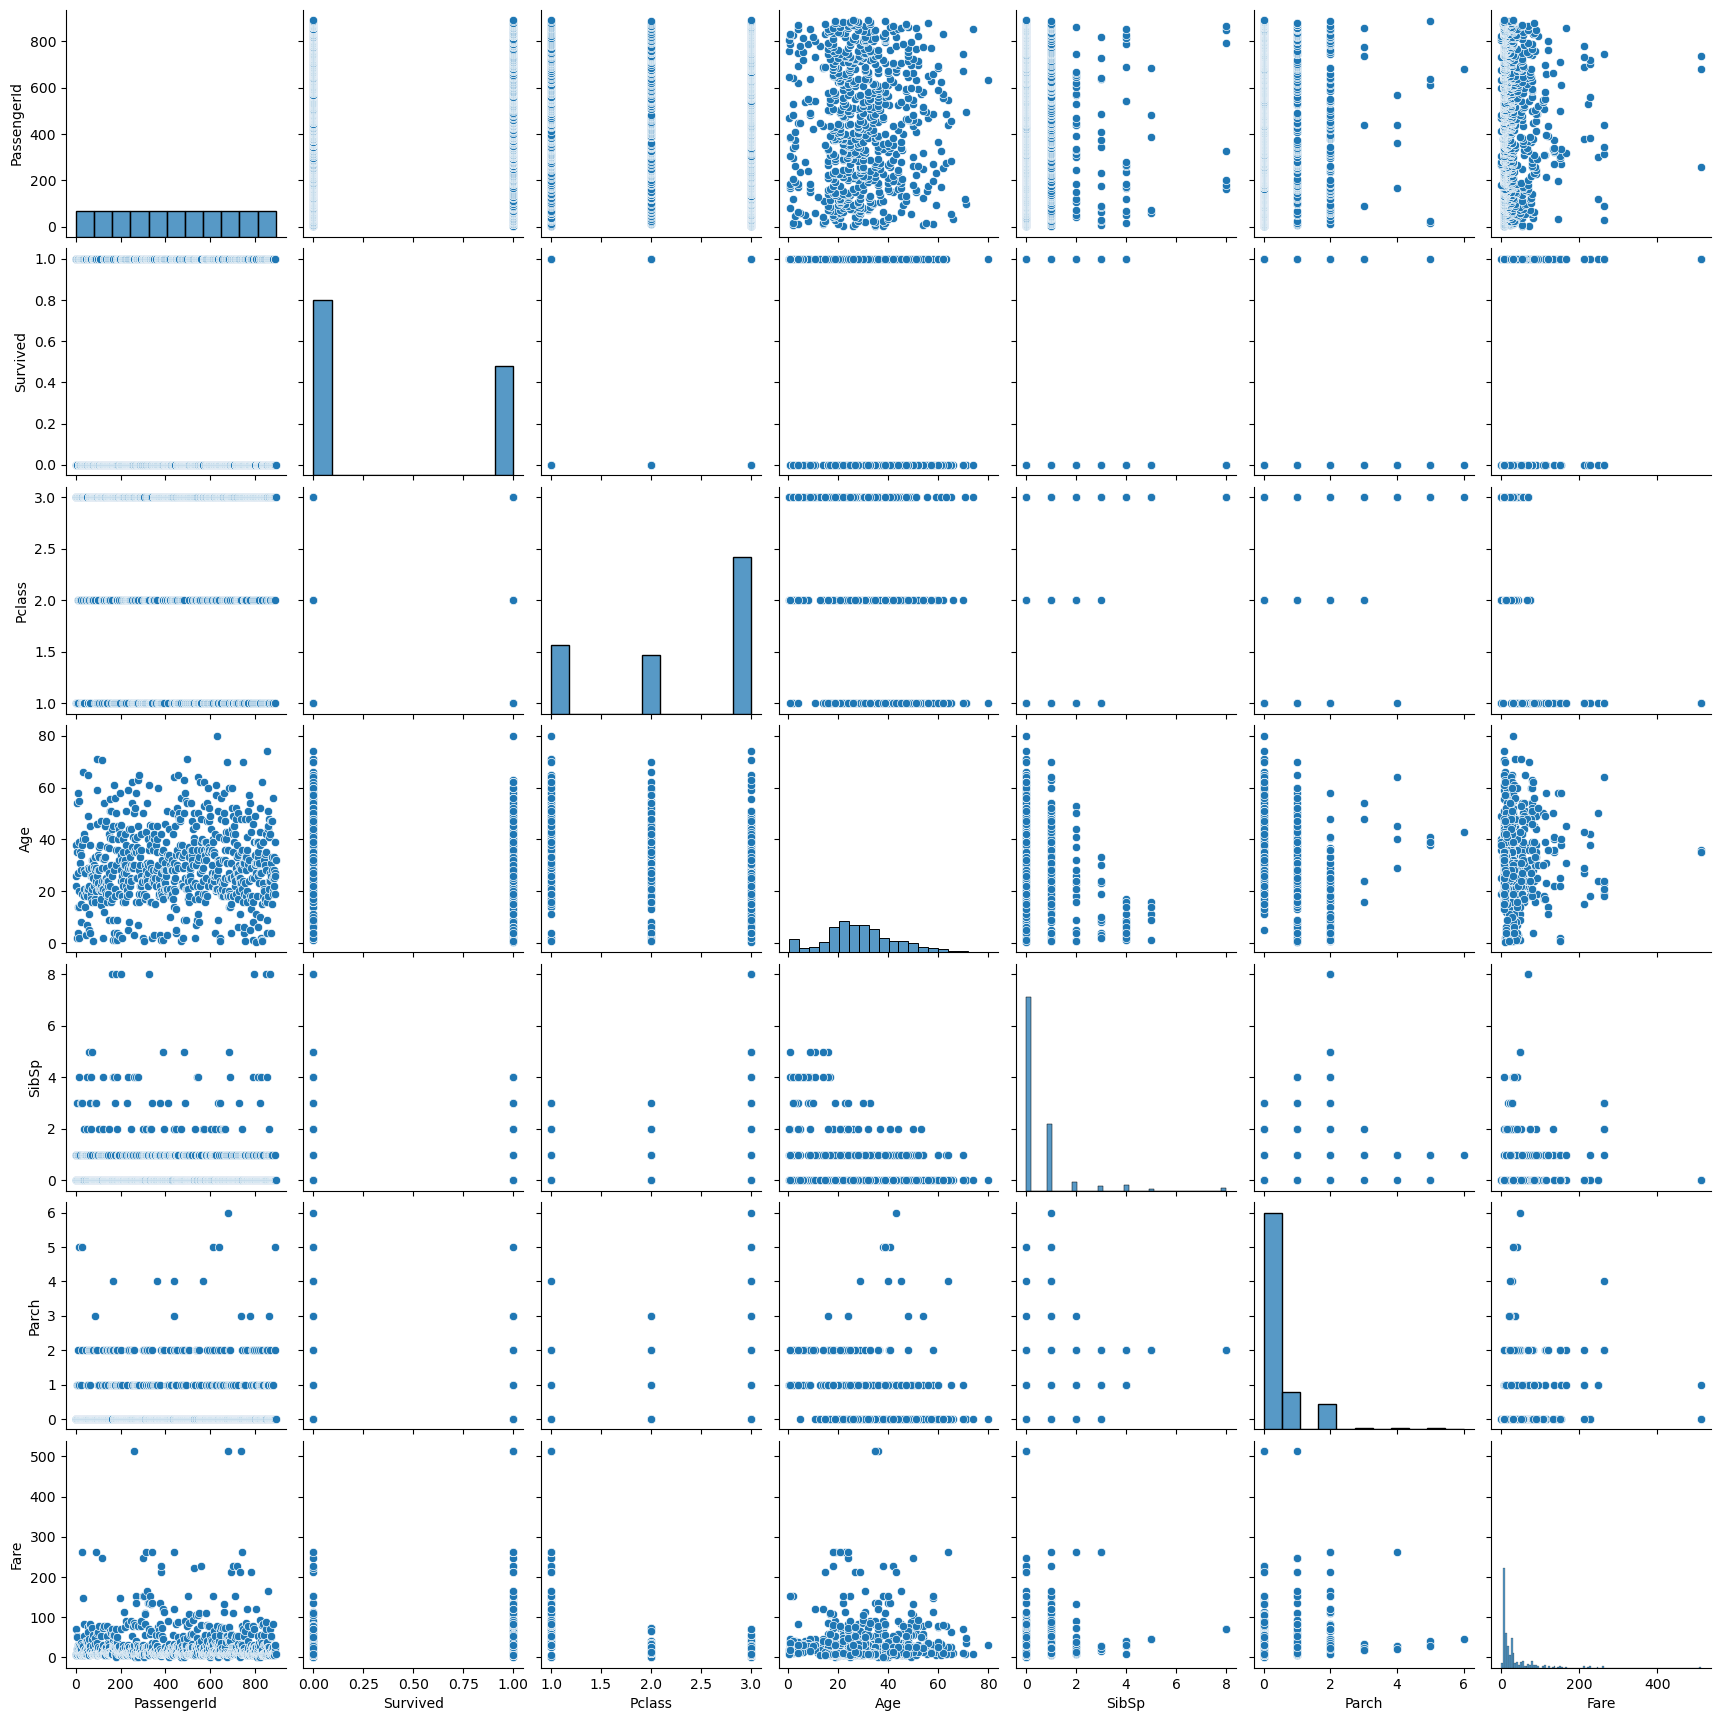

In [236]:
sns.pairplot(titanic)

C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


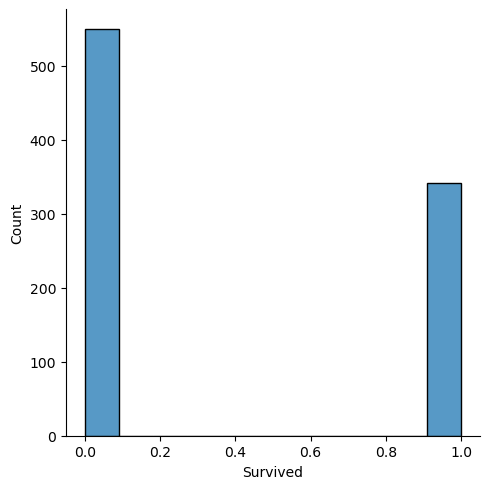

In [237]:
# Distribución de la variable survived

sns.displot(titanic["Survived"])

In [238]:
# Correlación de las variables numéricas

titanic[["Pclass","Age","SibSp","Parch","Fare"]].corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

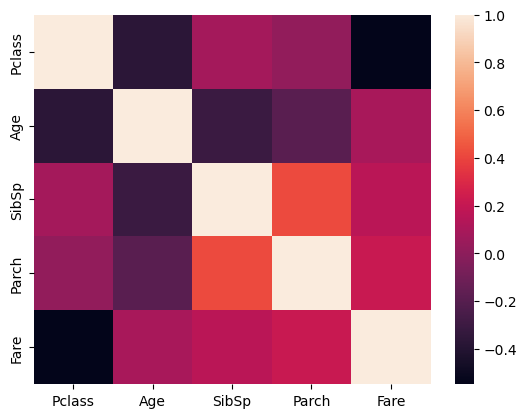

In [239]:
# Mapa de correlaciones
sns.heatmap(titanic[["Pclass","Age","SibSp","Parch","Fare"]].corr())

Estudiamos si existen valores missing

In [241]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [242]:
titanic.isnull().sum()/titanic.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

El 20% de la variable Age y el 77% de la variable Cabin vienen a missing, Para Age, la media era 29,7 y la mediana 28; para Cabin, posiblemente tenemos demasiados missing, por llo que prescindimos de esta variable. Para el caso de Embarked, podríamos sutituirlo por la clase más repetida, "S", pero al ser dos observaciones las vamos a elimianr.

En lugar de sustituir los mssing de Age por 29,7, miramos si podemos hacer una imputación más detallada cruzando con otra variable categórca, como Pclass.

<Axes: title={'center': 'Age'}, xlabel='[Pclass]'>

<Figure size 2000x1000 with 0 Axes>

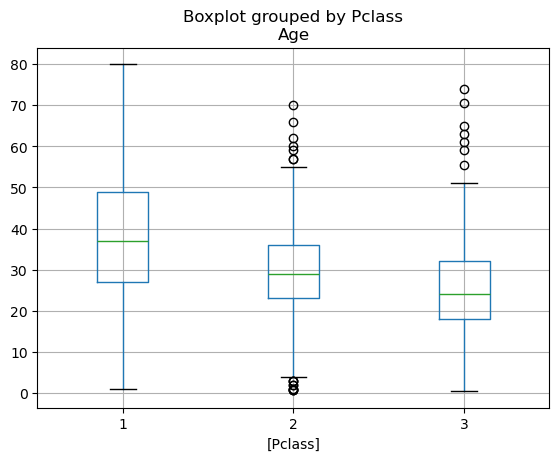

In [245]:
plt.figure(figsize=(20,10))
titanic[["Age","Pclass"]].boxplot(by="Pclass")

Sustituimos la variabe Age por 38,29 o 29 en función de si Pclass toma el valor 1,2 o 3. Para ello usamos esta función.

In [247]:
def imputar_edad(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 30
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [248]:
titanic["Age"]= titanic[["Age","Pclass"]].apply(imputar_edad,axis=1)

C:\Users\pauri\AppData\Local\Temp\ipykernel_25276\484630510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\pauri\AppData\Local\Temp\ipykernel_25276\484630510.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [249]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

No tenemos ninguna variabl NA de Age, falta eliminar la variable Cabin y las dos NA de Embarked.

In [251]:
titanic.drop("Cabin",axis=1,inplace=True)
titanic.dropna(inplace=True)

In [252]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Transformación variables categóricas 

Antes de estimar el random forest es necesario transformar las variables categóricas a variables numéricas. Para ello, vamos a generar variables ummis que idnique qué valor categórico de esas variabels toman. 

In [254]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [255]:
sex = pd.get_dummies(titanic["Sex"],drop_first=True).astype(int)
embarked = pd.get_dummies(titanic["Embarked"],drop_first=True).astype(int)

Eliminamos también la variabe ticket por ser un identificador único de los pasajeros.

In [257]:
titanic.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embarked],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [258]:
titanic.set_index("PassengerId")

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,24.0,1,2,23.4500,0,0,1


#### Preparación entrada modelos

En primer lugar, es necesario separar las variables independientes, <b>X = (x1,...x8)</b> de la variable dependiente, <b>y</b>, y además separamos la muestra en un 70% para estimar el modelo y un 30% para evaluarlo.

In [260]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.3,random_state=123456789)

#### Estimación del random forest

In [263]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=123456789, max_depth=5, max_features="sqrt")

In [264]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=123456789)

#### Clasificación con el random forest

Podemos obtener las predicciones como probabiliaddes o clases estimadas,

In [266]:
test_prediction_1= rf_model.predict(X_test)
test_prediction_1

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [267]:
test_predict_prob_1=rf_model.predict_proba(X_test)
test_predict_prob_1

array([[0.65990528, 0.34009472],
       [0.73661677, 0.26338323],
       [0.43042535, 0.56957465],
       [0.86937385, 0.13062615],
       [0.43159445, 0.56840555],
       [0.89155465, 0.10844535],
       [0.13362635, 0.86637365],
       [0.81801311, 0.18198689],
       [0.87944676, 0.12055324],
       [0.6951776 , 0.3048224 ],
       [0.88032449, 0.11967551],
       [0.6633096 , 0.3366904 ],
       [0.72458881, 0.27541119],
       [0.79284554, 0.20715446],
       [0.81652763, 0.18347237],
       [0.88428121, 0.11571879],
       [0.68134456, 0.31865544],
       [0.35982871, 0.64017129],
       [0.36041345, 0.63958655],
       [0.46684657, 0.53315343],
       [0.85807479, 0.14192521],
       [0.2312284 , 0.7687716 ],
       [0.09057965, 0.90942035],
       [0.15086852, 0.84913148],
       [0.05733587, 0.94266413],
       [0.85209242, 0.14790758],
       [0.09222138, 0.90777862],
       [0.87922019, 0.12077981],
       [0.89346378, 0.10653622],
       [0.72332394, 0.27667606],
       [0.

#### Visualización o interpretación del random forest

La estrucutra del random fotrest es similar a la de un árbol de decisión (sentencias condicionales, se asigna la probabilidad del nodo en el que cae la observación que se evalúa), pero agregando los <b>n<(b> árboles incluidos en el bosque aleatorio (100 en el caso anterior).
    
La visualización de los 100 árboles es compleja y no aporta mucho valor, porque cada uno de ellos tienen poco peso en la decisión final.

In [269]:
# Guardamos los dos promeros árboles de random forest
tree_1 = rf_model.estimators_[1]
tree_2 = rf_model.estimators_[2]

[Text(0.42567567567567566, 0.9166666666666666, 'x[5] <= 15.148\ngini = 0.46\nsamples = 395\nvalue = [399, 223]'),
 Text(0.14864864864864866, 0.75, 'x[2] <= 15.5\ngini = 0.329\nsamples = 213\nvalue = [263, 69]'),
 Text(0.05405405405405406, 0.5833333333333334, 'x[8] <= 0.5\ngini = 0.245\nsamples = 9\nvalue = [2, 12]'),
 Text(0.02702702702702703, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [0, 9]'),
 Text(0.08108108108108109, 0.4166666666666667, 'x[5] <= 11.469\ngini = 0.48\nsamples = 3\nvalue = [2, 3]'),
 Text(0.05405405405405406, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.10810810810810811, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.24324324324324326, 0.5833333333333334, 'x[4] <= 1.5\ngini = 0.294\nsamples = 204\nvalue = [261, 57]'),
 Text(0.1891891891891892, 0.4166666666666667, 'x[5] <= 14.096\ngini = 0.292\nsamples = 202\nvalue = [260, 56]'),
 Text(0.16216216216216217, 0.25, 'x[0] <= 26.0\ngini = 0.303\nsamples = 192\nvalue = [245, 56]'),
 Text(

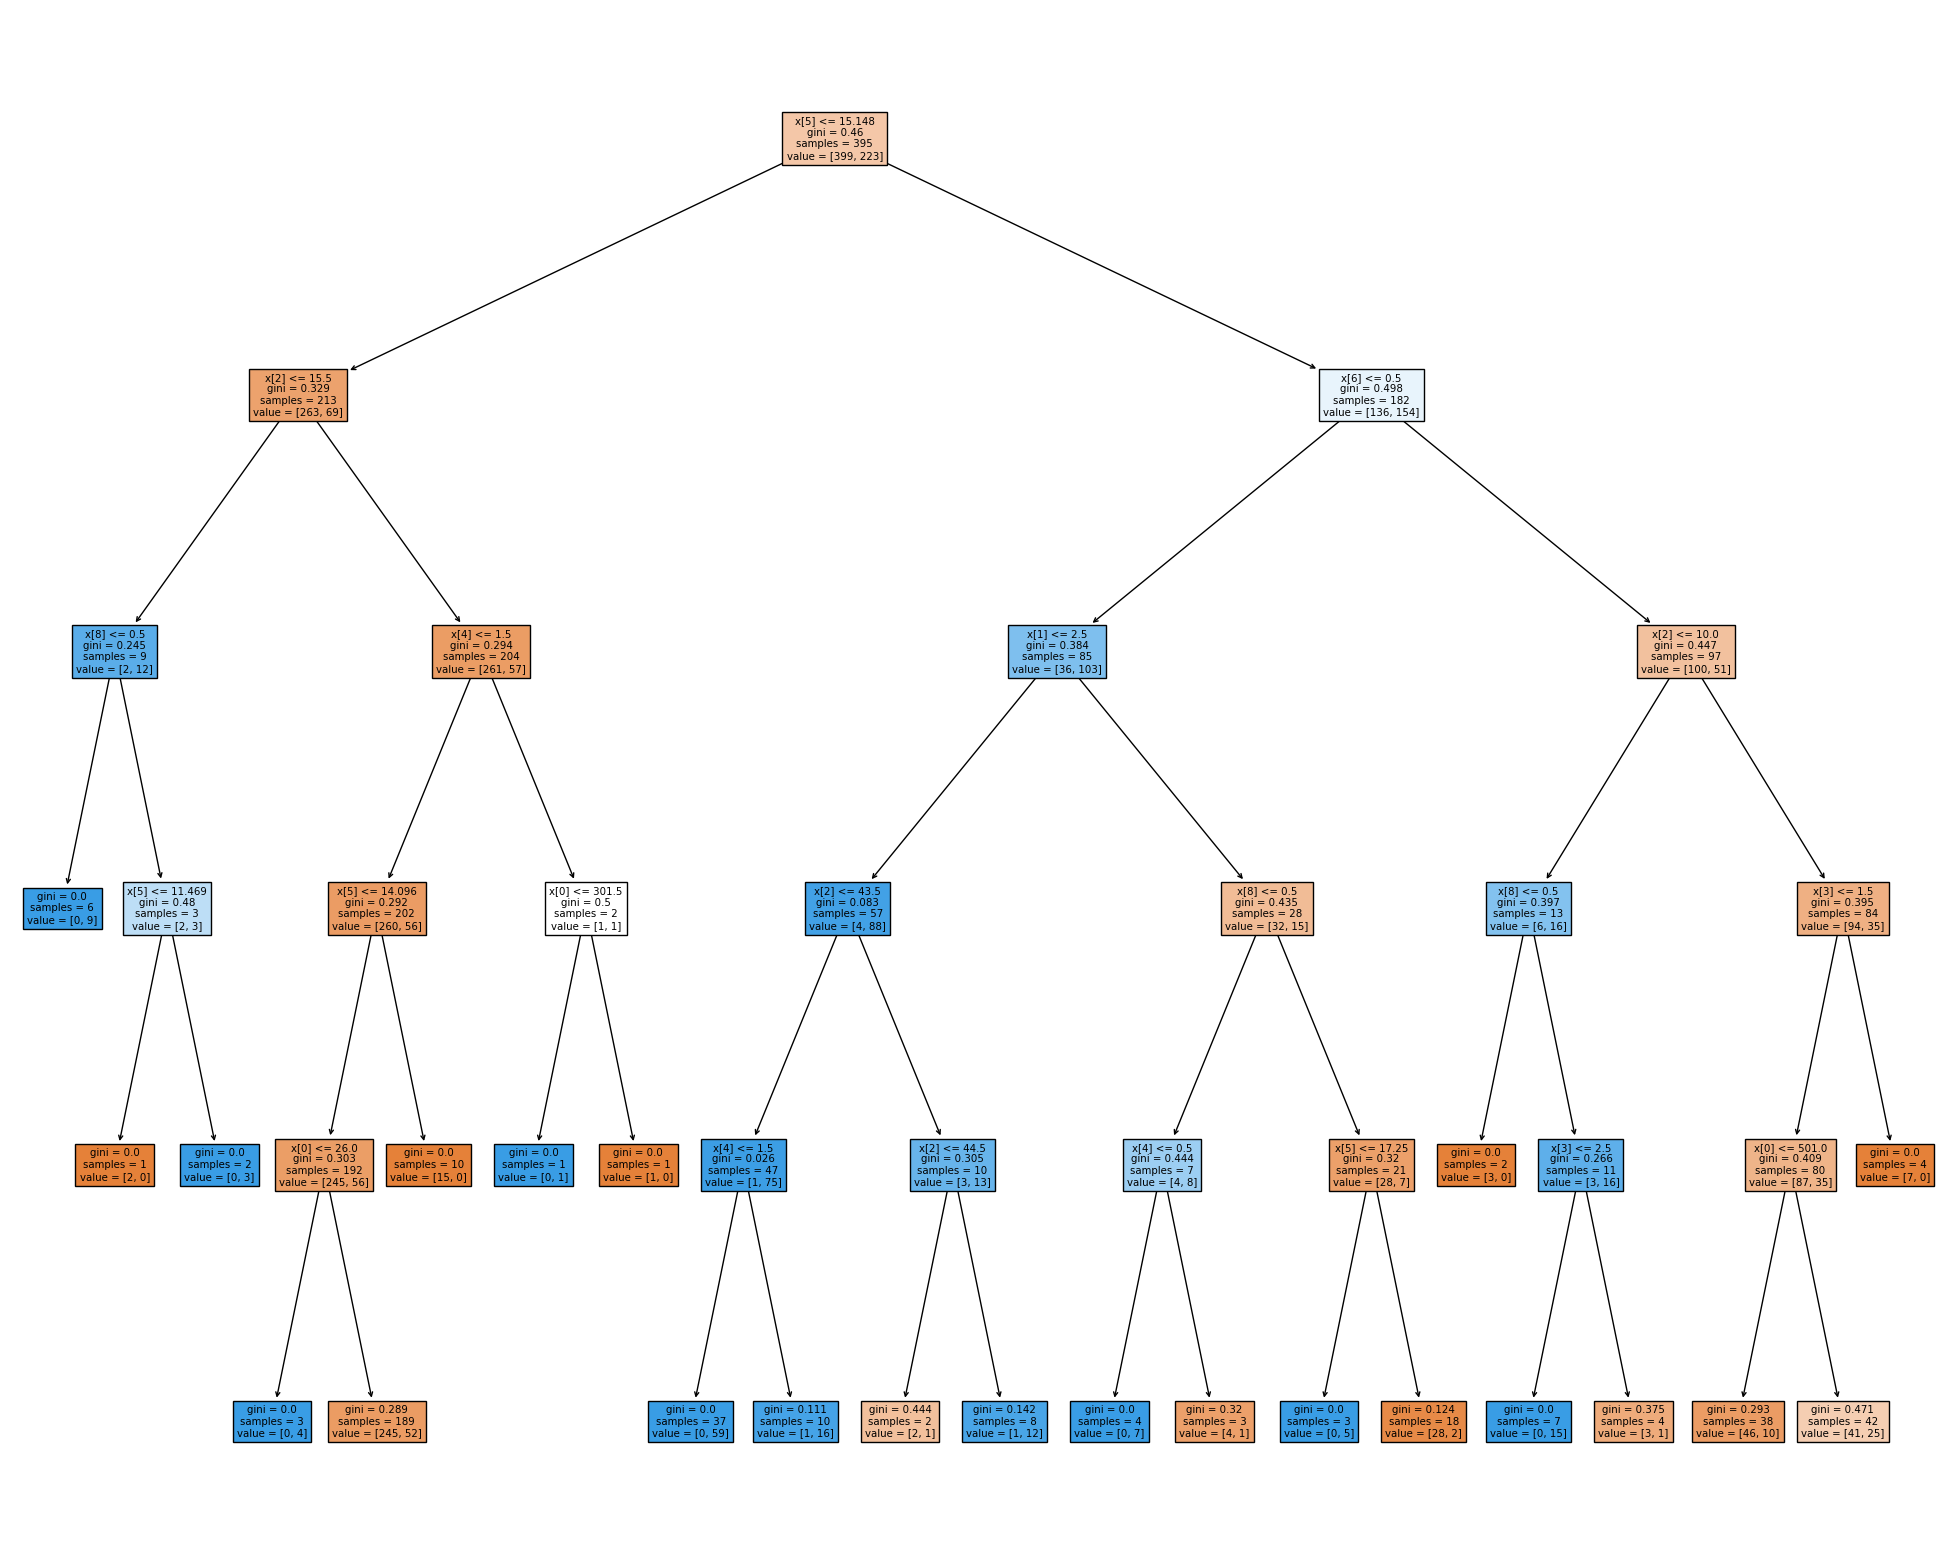

In [270]:
# visualización del primero

fig = plt.figure(figsize=(25,20))

tree.plot_tree(tree_1, filled=True)

[Text(0.5116279069767442, 0.9166666666666666, 'x[1] <= 2.5\ngini = 0.468\nsamples = 410\nvalue = [390, 232]'),
 Text(0.22674418604651161, 0.75, 'x[6] <= 0.5\ngini = 0.487\nsamples = 187\nvalue = [120, 167]'),
 Text(0.11627906976744186, 0.5833333333333334, 'x[4] <= 1.5\ngini = 0.074\nsamples = 84\nvalue = [5, 125]'),
 Text(0.06976744186046512, 0.4166666666666667, 'x[4] <= 0.5\ngini = 0.052\nsamples = 74\nvalue = [3, 110]'),
 Text(0.046511627906976744, 0.25, 'x[2] <= 55.5\ngini = 0.067\nsamples = 57\nvalue = [3, 83]'),
 Text(0.023255813953488372, 0.08333333333333333, 'gini = 0.024\nsamples = 55\nvalue = [1, 82]'),
 Text(0.06976744186046512, 0.08333333333333333, 'gini = 0.444\nsamples = 2\nvalue = [2, 1]'),
 Text(0.09302325581395349, 0.25, 'gini = 0.0\nsamples = 17\nvalue = [0, 27]'),
 Text(0.16279069767441862, 0.4166666666666667, 'x[2] <= 2.5\ngini = 0.208\nsamples = 10\nvalue = [2, 15]'),
 Text(0.13953488372093023, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18604651162790

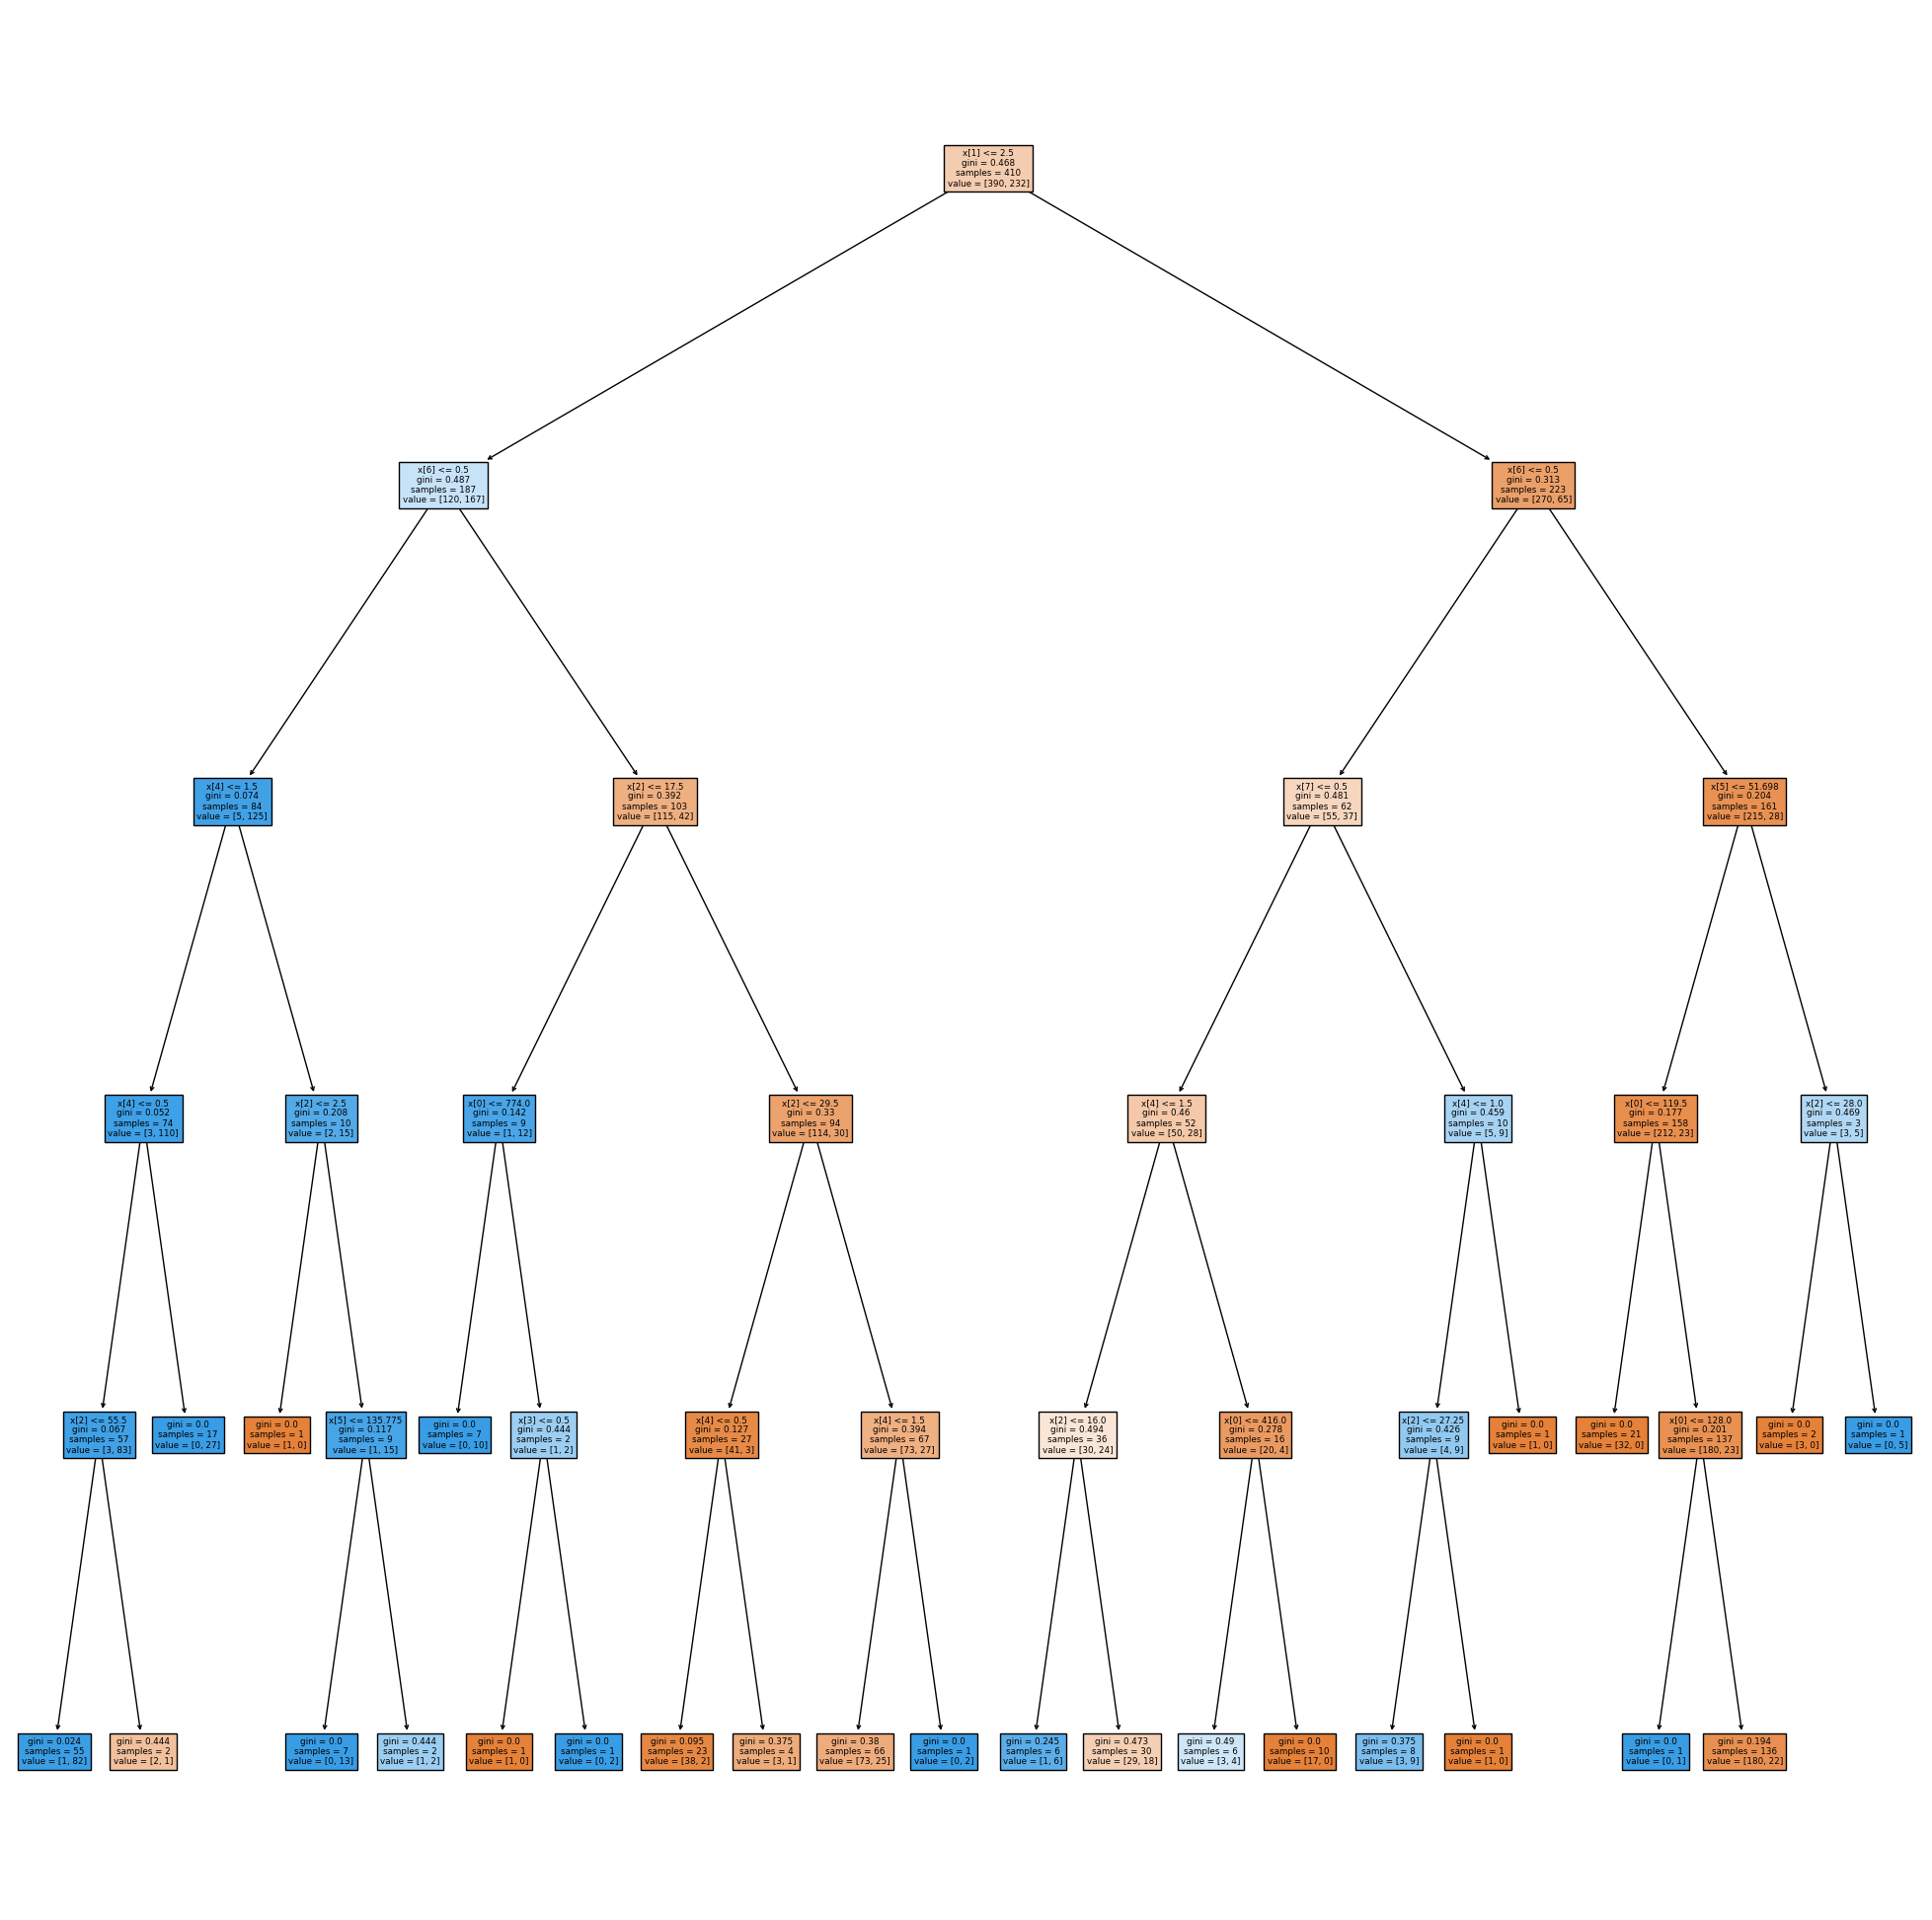

In [271]:
# Visualización del segundo

fig = plt.figure(figsize=(25,25))

tree.plot_tree(tree_2, filled=True)

In [272]:
# A mayor valor, mayor importancia de la variable en el random forest

rf_model.feature_importances_

array([0.07187956, 0.14967871, 0.10925512, 0.0505932 , 0.03217782,
       0.17147441, 0.3921748 , 0.01094239, 0.011824  ])

In [273]:
# Recordemos las variables 
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

#### Evaluación del árbol de decisión

Al tratarse de un modelo de clasificación que proporciona las mismas salidas que la regresión logística (permite estimar la probabikidad de target positivo y la cateogria), se pueden utilizar las mismas técnicas para ecaluarlo.

Calculamos la matriz de confusión, algunas métricas de evaluación habituales, y el coeficiente <b>AUC</b> o <b>ROC</b> y el <b>gini</b> para ambos modelos.

* accuaracy ) (TP+TN)/(TP+TN+FP+FN)
* precisión = TP/(TP+FP)
* recall (o sensivity) = TP/(TP+FN)
* AUC o AUROC o ROC es el área bajo la curva ROC, que ilustra la acumulación de TP y FP a medida que se acumula una puntuación (de mayor a menor probabilidad estimada)

<Axes: >

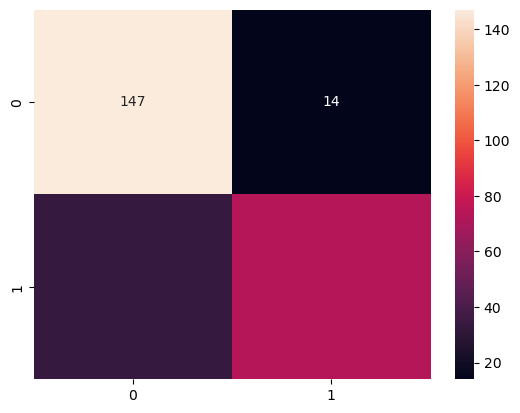

In [312]:
cm = confusion_matrix(y_test,test_prediction_1)
sns.heatmap(cm,annot=True, fmt="d")

In [316]:
print(classification_report(y_test,test_prediccion_1))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       161
           1       0.84      0.69      0.76       106

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



Para obtener la curva y métrica ROC, volvemos a utilizar las probabilidades estimadas(en lugar de las clases).

In [321]:
fpr_1,tpr_1,umbrales_1=roc_curve(y_test, test_predict_prob_1[:,1], pos_label = 1)

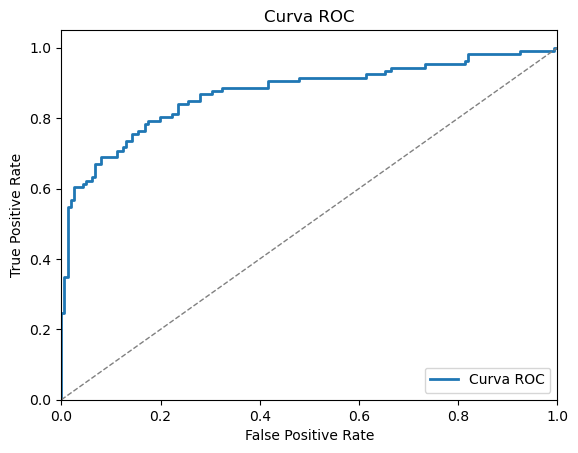

In [323]:
plt.figure()
lw = 2
plt.plot(fpr_1, tpr_1,
         lw=lw, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [325]:
auc_1= auc(fpr_1,tpr_1)
auc_1

0.8723192312199695

In [329]:
gini_1=2*auc_1-1
gini_1

0.7446384624399389